In [10]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Import data

In [11]:
# Specify the path to your JSON file
json_file_path = 'News_Category_Dataset_IS_course.json'

# Load only the first 1000 lines from the JSON file
with open(json_file_path, 'r') as file:
    data = [json.loads(line) for line in file.readlines()[:1000]]

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Drop rows with missing short_description
df = df.dropna(subset=['short_description'])

# Encode categories into numerical labels
df['category_label'] = pd.Categorical(df['category']).codes

# Select relevant columns
df = df[['short_description', 'category_label']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['short_description'], df['category_label'], test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define cross-validation strategy (StratifiedKFold is suitable for classification tasks)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Transform the entire dataset
X_tfidf = vectorizer.fit_transform(df['short_description'])

# Logistic Regression Model

In [12]:
# Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Cross-validation for Logistic Regression
logistic_regression_cv_scores = cross_val_score(logistic_regression_model, X_tfidf, df['category_label'], cv=cv, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", logistic_regression_cv_scores)
print("Mean Accuracy:", logistic_regression_cv_scores.mean())

# Hyperparameter tuning for Logistic Regression
logistic_regression_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_grid = GridSearchCV(logistic_regression_model, logistic_regression_params, cv=5, scoring='accuracy')
logistic_regression_grid.fit(X_train_tfidf, y_train)

# Print the best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:")
print(logistic_regression_grid.best_params_)

# Make predictions on the test set using the best Logistic Regression model
logistic_regression_predictions = logistic_regression_grid.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print("\nLogistic Regression Accuracy (with hyperparameter tuning):", logistic_regression_accuracy)
print(classification_report(y_test, logistic_regression_predictions))


c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Logistic Regression Cross-Validation Scores: [0.66       0.66       0.69       0.68686869 0.68686869 0.67676768
 0.65656566 0.67676768 0.6969697  0.5959596 ]
Mean Accuracy: 0.6686767676767678


c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters for Logistic Regression:
{'C': 100}

Logistic Regression Accuracy (with hyperparameter tuning): 0.7085427135678392
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.50      0.17      0.25         6
           3       0.71      0.84      0.77        56
           4       0.00      0.00      0.00         5
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         2
           7       0.73      0.92      0.82        89
           9       0.75      0.33      0.46        18
          10       0.00      0.00      0.00         4
          12       0.57      0.40      0.47        10

    accuracy                           0.71       199
   macro avg       0.39      0.27      0.30       199
weighted avg       0.65      0.71      0.66       199



c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

# Random Forest Model

In [15]:
# Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation for Random Forest
random_forest_cv_scores = cross_val_score(random_forest_model, X_tfidf, df['category_label'], cv=cv, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores:", random_forest_cv_scores)
print("Mean Accuracy:", random_forest_cv_scores.mean())

# Hyperparameter tuning for Random Forest
random_forest_params = {'n_estimators': [100, 150, 200], 'max_depth': [20, 30, 40, 50]}

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_grid = GridSearchCV(random_forest_model, random_forest_params, cv=cv, scoring='accuracy')
random_forest_grid.fit(X_train_tfidf, y_train)

# Print the best hyperparameters for Random Forest
print("\nBest Hyperparameters for Random Forest:")
print(random_forest_grid.best_params_)

# Make predictions on the test set using the best Random Forest model
random_forest_predictions = random_forest_grid.predict(X_test_tfidf)

# Evaluate the Random Forest model
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("\nRandom Forest Accuracy (with hyperparameter tuning):", random_forest_accuracy)
print(classification_report(y_test, random_forest_predictions))

c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(



Random Forest Cross-Validation Scores: [0.65       0.65       0.71       0.67676768 0.66666667 0.6969697
 0.64646465 0.72727273 0.65656566 0.60606061]
Mean Accuracy: 0.6686767676767678


c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(



Best Hyperparameters for Random Forest:
{'max_depth': 50, 'n_estimators': 150}

Random Forest Accuracy (with hyperparameter tuning): 0.5879396984924623
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         6
           3       0.63      0.57      0.60        56
           4       0.00      0.00      0.00         5
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         2
           7       0.58      0.93      0.72        89
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00         4
          12       0.25      0.10      0.14        10

    accuracy                           0.59       199
   macro avg       0.22      0.18      0.18       199
weighted avg       0.47      0.59      0.50       199



c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

# KNN Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Cross-validation for KNN
knn_cv_scores = cross_val_score(knn_model, X_tfidf, df['category_label'], cv=cv, scoring='accuracy')
print("\nKNN Cross-Validation Scores:", knn_cv_scores)
print("Mean Accuracy:", knn_cv_scores.mean())

# Hyperparameter tuning for KNN
knn_params = {'n_neighbors': range(1, 11)}

knn_grid = GridSearchCV(knn_model, knn_params, cv=cv, scoring='accuracy')
knn_grid.fit(X_train_tfidf, y_train)

# Print the best hyperparameters for KNN
print("\nBest Hyperparameters for KNN:")
print(knn_grid.best_params_)

# Make predictions on the test set using the best KNN model
knn_predictions = knn_grid.predict(X_test_tfidf)

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("\nKNN Accuracy (with hyperparameter tuning):", knn_accuracy)
print(classification_report(y_test, knn_predictions))


c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(



KNN Cross-Validation Scores: [0.67       0.63       0.68       0.66666667 0.67676768 0.68686869
 0.68686869 0.65656566 0.67676768 0.64646465]
Mean Accuracy: 0.6676969696969697


c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(



Best Hyperparameters for KNN:
{'n_neighbors': 10}

KNN Accuracy (with hyperparameter tuning): 0.6482412060301508
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         6
           3       0.63      0.80      0.71        56
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.69      0.85      0.76        89
           9       0.62      0.28      0.38        18
          10       0.33      0.25      0.29         4
          12       0.50      0.20      0.29        10

    accuracy                           0.65       199
   macro avg       0.25      0.22      0.22       199
weighted avg       0.58      0.65      0.60       199



c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

# SVM Model

In [19]:
from sklearn.svm import SVC

# SVM model
svm_model = SVC(kernel='linear')  # You can adjust the kernel and other parameters

# Cross-validation for SVM
svm_cv_scores = cross_val_score(svm_model, X_tfidf, df['category_label'], cv=cv, scoring='accuracy')
print("\nSVM Cross-Validation Scores:", svm_cv_scores)
print("Mean Accuracy:", svm_cv_scores.mean())

# Hyperparameter tuning for SVM
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}  # You can adjust the range of C and kernel

svm_grid = GridSearchCV(svm_model, svm_params, cv=cv, scoring='accuracy')
svm_grid.fit(X_train_tfidf, y_train)

# Print the best hyperparameters for SVM
print("\nBest Hyperparameters for SVM:")
print(svm_grid.best_params_)

# Make predictions on the test set using the best SVM model
svm_predictions = svm_grid.predict(X_test_tfidf)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nSVM Accuracy (with hyperparameter tuning):", svm_accuracy)
print(classification_report(y_test, svm_predictions))


c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(



SVM Cross-Validation Scores: [0.73       0.68       0.72       0.6969697  0.70707071 0.72727273
 0.66666667 0.74747475 0.72727273 0.62626263]
Mean Accuracy: 0.7028989898989899


c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(



Best Hyperparameters for SVM:
{'C': 1, 'kernel': 'linear'}

SVM Accuracy (with hyperparameter tuning): 0.6934673366834171
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         6
           3       0.71      0.75      0.73        56
           4       0.00      0.00      0.00         5
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         2
           7       0.68      0.96      0.79        89
           9       0.83      0.28      0.42        18
          10       0.00      0.00      0.00         4
          12       0.62      0.50      0.56        10

    accuracy                           0.69       199
   macro avg       0.35      0.26      0.27       199
weighted avg       0.63      0.69      0.63       199



c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

# Naive Bayes Model

In [22]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes model (Multinomial Naive Bayes)
naive_bayes_model = MultinomialNB()

# Cross-validation for Naive Bayes
naive_bayes_cv_scores = cross_val_score(naive_bayes_model, X_tfidf, df['category_label'], cv=cv, scoring='accuracy')
print("\nNaive Bayes Cross-Validation Scores:", naive_bayes_cv_scores)
print("Mean Accuracy:", naive_bayes_cv_scores.mean())

# Hyperparameter tuning for Naive Bayes
naive_bayes_params = {'alpha': [0.1, 0.5, 1.0, 2.0]}  # You can adjust the range of alpha

naive_bayes_grid = GridSearchCV(naive_bayes_model, naive_bayes_params, cv=cv, scoring='accuracy')
naive_bayes_grid.fit(X_train_tfidf, y_train)

# Print the best hyperparameters for Naive Bayes
print("\nBest Hyperparameters for Naive Bayes:")
print(naive_bayes_grid.best_params_)

# Make predictions on the test set using the best Naive Bayes model
naive_bayes_predictions = naive_bayes_grid.predict(X_test_tfidf)

# Evaluate the Naive Bayes model
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print("\nNaive Bayes Accuracy (with hyperparameter tuning):", naive_bayes_accuracy)
print(classification_report(y_test, naive_bayes_predictions))



Naive Bayes Cross-Validation Scores: [0.64       0.61       0.64       0.65656566 0.67676768 0.6969697
 0.66666667 0.67676768 0.70707071 0.60606061]
Mean Accuracy: 0.6576868686868688

Best Hyperparameters for Naive Bayes:
{'alpha': 0.1}

Naive Bayes Accuracy (with hyperparameter tuning): 0.678391959798995
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         6
           3       0.72      0.73      0.73        56
           4       0.00      0.00      0.00         5
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         2
           7       0.67      0.97      0.79        89
           9       0.75      0.17      0.27        18
          10       0.00      0.00      0.00         4
          12       0.50      0.40      0.44        10

    accuracy                           0.6

c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set

# Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Cross-validation for Decision Tree
decision_tree_cv_scores = cross_val_score(decision_tree_model, X_tfidf, df['category_label'], cv=cv, scoring='accuracy')
print("\nDecision Tree Cross-Validation Scores:", decision_tree_cv_scores)
print("Mean Accuracy:", decision_tree_cv_scores.mean())

# Hyperparameter tuning for Decision Tree
decision_tree_params = {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

decision_tree_grid = GridSearchCV(decision_tree_model, decision_tree_params, cv=cv, scoring='accuracy')
decision_tree_grid.fit(X_train_tfidf, y_train)

# Print the best hyperparameters for Decision Tree
print("\nBest Hyperparameters for Decision Tree:")
print(decision_tree_grid.best_params_)

# Make predictions on the test set using the best Decision Tree model
decision_tree_predictions = decision_tree_grid.predict(X_test_tfidf)

# Evaluate the Decision Tree model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print("\nDecision Tree Accuracy (with hyperparameter tuning):", decision_tree_accuracy)
print(classification_report(y_test, decision_tree_predictions))


c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(



Decision Tree Cross-Validation Scores: [0.56       0.6        0.61       0.60606061 0.55555556 0.60606061
 0.64646465 0.56565657 0.5959596  0.46464646]
Mean Accuracy: 0.581040404040404


c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(



Best Hyperparameters for Decision Tree:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}

Decision Tree Accuracy (with hyperparameter tuning): 0.5477386934673367
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         6
           3       0.62      0.46      0.53        56
           4       0.20      0.20      0.20         5
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         2
           7       0.56      0.85      0.68        89
           9       0.50      0.11      0.18        18
          10       0.00      0.00      0.00         4
          12       0.33      0.10      0.15        10

    accuracy                           0.55       199
   macro avg       0.27      0.25      0.24       199
weighted avg       0.50      0.55      0.49       199



c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

# Majority Classifier Model

In [26]:
from sklearn.dummy import DummyClassifier

# Majority Classifier model
majority_classifier_model = DummyClassifier(strategy='most_frequent')

# Cross-validation for Majority Classifier
majority_classifier_cv_scores = cross_val_score(majority_classifier_model, X_tfidf, df['category_label'], cv=cv, scoring='accuracy')
print("\nMajority Classifier Cross-Validation Scores:", majority_classifier_cv_scores)
print("Mean Accuracy:", majority_classifier_cv_scores.mean())

# Since there are no hyperparameters to tune, we don't need GridSearchCV for Majority Classifier

# Fit the Majority Classifier model to the training data
majority_classifier_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
majority_classifier_predictions = majority_classifier_model.predict(X_test_tfidf)

# Evaluate the Majority Classifier model
majority_classifier_accuracy = accuracy_score(y_test, majority_classifier_predictions)
print("\nMajority Classifier Accuracy:", majority_classifier_accuracy)
print(classification_report(y_test, majority_classifier_predictions))



Majority Classifier Cross-Validation Scores: [0.48       0.49       0.49       0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.48484848 0.48484848]
Mean Accuracy: 0.49044444444444435

Majority Classifier Accuracy: 0.4472361809045226
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        56
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.45      1.00      0.62        89
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        10

    accuracy                           0.45       199
   macro avg       0.04      0.09      0.06       19

c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packa

# Visualize results

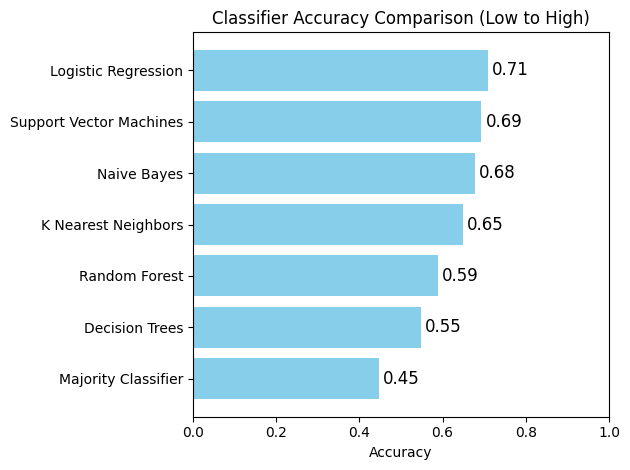

In [27]:
# Create a plot for the results
from matplotlib import pyplot as plt


results = [logistic_regression_accuracy, random_forest_accuracy, knn_accuracy,
            svm_accuracy, naive_bayes_accuracy, decision_tree_accuracy, majority_classifier_accuracy]
classifiers = ['Logistic Regression', 'Random Forest', 'K Nearest Neighbors',
            'Support Vector Machines', 'Naive Bayes', 'Decision Trees', 'Majority Classifier']

# Sort results and classifiers in ascending order of accuracy
sorted_results, sorted_classifiers = zip(*sorted(zip(results, classifiers)))

# Create a bar plot
plt.barh(sorted_classifiers, sorted_results, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy Comparison (Low to High)')
plt.xlim(0, 1.0)  # Set the x-axis limits from 0 to 1 for accuracy values

# Annotate the bars with accuracy values
for i, result in enumerate(sorted_results):
    plt.text(result + 0.01, i, f'{result:.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()